In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

In [2]:
health_stats_df = pd.read_csv("data/health_stats_global.csv")
# health_stats_df.sample(15)
# health_stats_df.describe()
# health_stats_df.info()

# Possible Questions to Explore

## Question List:

### Questions about the US?
### Literacy rate, adult male (% of males ages 15 and above)
### Literacy rate, adult female (% of female ages 15 and above)
### Health expenditure, total (% of GDP)
### Population growth (annual %)
### Rural population (% of total population)
### Labor force, female (% of total labor force)	
### Labor force, male (% of total labor force)

In [3]:

US_femalelabor_mask = (health_stats_df['Country Name'] == "United States") & (health_stats_df["Indicator Name"] == "Labor force, female (% of total labor force)")
health_stats_df[US_femalelabor_mask]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
85359,United States,USA,"Labor force, female (% of total labor force)",SL.TLF.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,45.805979,45.950191,46.125431,46.205242,46.057382,45.936732,45.792657,45.839276,NaN,NaN


In [4]:
popgrowth_mask = health_stats_df['Indicator Name'] == 'Population growth (annual %)'
# health_stats_df[popgrowth_mask].head()

pop_growthdf = health_stats_df[popgrowth_mask]
pop_growthdf = pop_growthdf.drop(['Indicator Code', 'Indicator Name','Country Code','Unnamed: 60'], axis=1)
pop_growthdf = pop_growthdf.set_index('Country Name')

In [5]:
pop_growthdf.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,
Arab World,NaN,2.741996,2.769515,2.792110,2.811906,2.828133,2.850383,2.867694,2.861356,2.826982,...,2.385159,2.449255,2.469810,2.424469,2.335303,2.242795,2.152384,2.088283,2.050000,2.029991
Caribbean small states,NaN,1.911755,1.931196,1.893275,1.771980,1.605163,1.448561,1.298573,1.196177,1.164617,...,0.607070,0.633955,0.649817,0.649227,0.636539,0.614597,0.585947,0.557091,0.531885,0.514897
Central Europe and the Baltics,NaN,0.914136,0.843231,0.893254,0.934352,0.764829,0.735036,0.930801,0.864361,0.735317,...,-0.240341,-0.466785,-0.358132,-0.192448,-0.362710,-0.353692,-0.229155,-0.213202,-0.209757,-0.171544
Early-demographic dividend,NaN,2.378681,2.399318,2.411945,2.425629,2.435707,2.442855,2.455314,2.457393,2.465558,...,1.596281,1.576339,1.557348,1.538742,1.528734,1.507963,1.476112,1.457399,1.438927,1.419336
East Asia & Pacific,NaN,0.317912,1.356230,2.403411,2.313426,2.356414,2.604640,2.458242,2.434869,2.665623,...,0.726182,0.687229,0.689983,0.667171,0.658738,0.657531,0.668169,0.670721,0.673393,0.667919


C:\Users\Brandon H\AppData\Local\Temp\ipykernel_30224\3448296276.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pop_growth_samp.T.index.values, rotation=65, fontsize=12)


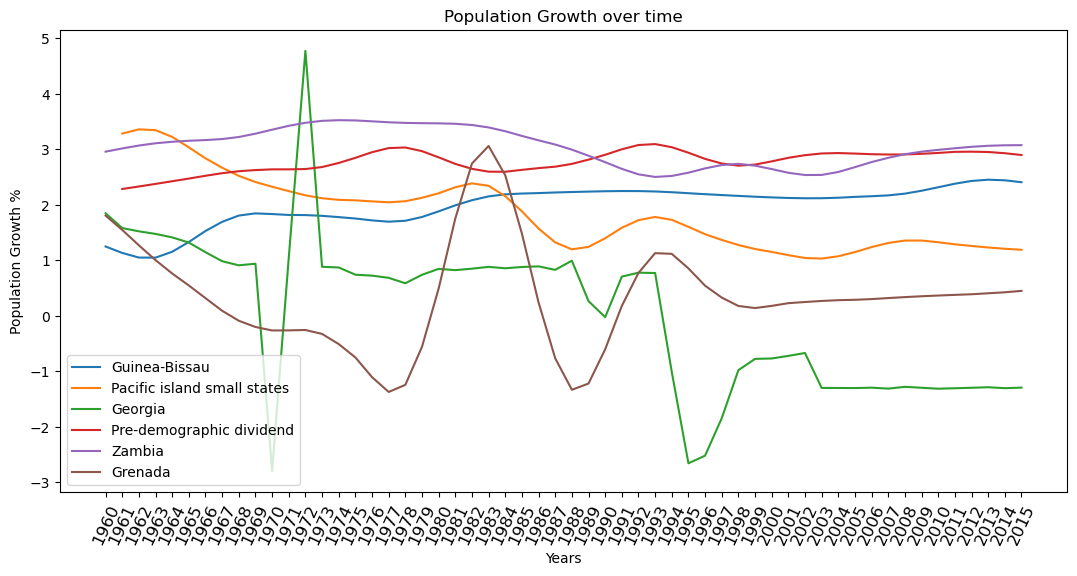

In [6]:
pop_growth_samp = pop_growthdf.sample(6)
# pop_growth_world = pop_growthdf.loc['World']
fig, ax = plt.subplots(figsize=(13,6))
country_names = pop_growth_samp.T.columns.values
ax.plot(pop_growth_samp.T, label = country_names)
# ax.plot(pop_growth_world)
ax.legend()
ax.set_title('Population Growth over time')
ax.set_ylabel('Population Growth %')
ax.set_xlabel('Years')
ax.set_xticklabels(pop_growth_samp.T.index.values, rotation=65, fontsize=12)
plt.show()

## What is the variance for the mean of population growth over time (volatility) for a given sample of countries?

1. Clean the data to down to just countries and population growth
2. Narrow down to just countries, not groups of countries and other entries
3. Get Mean Population growth for each country and put that in a new column
4. Create a plot that plots the variance of each value from the mean over time for a sample of 3 countries

#### Step 1

In [7]:
pop_growthdf.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,
Arab World,NaN,2.741996,2.769515,2.792110,2.811906,2.828133,2.850383,2.867694,2.861356,2.826982,...,2.385159,2.449255,2.469810,2.424469,2.335303,2.242795,2.152384,2.088283,2.050000,2.029991
Caribbean small states,NaN,1.911755,1.931196,1.893275,1.771980,1.605163,1.448561,1.298573,1.196177,1.164617,...,0.607070,0.633955,0.649817,0.649227,0.636539,0.614597,0.585947,0.557091,0.531885,0.514897
Central Europe and the Baltics,NaN,0.914136,0.843231,0.893254,0.934352,0.764829,0.735036,0.930801,0.864361,0.735317,...,-0.240341,-0.466785,-0.358132,-0.192448,-0.362710,-0.353692,-0.229155,-0.213202,-0.209757,-0.171544
Early-demographic dividend,NaN,2.378681,2.399318,2.411945,2.425629,2.435707,2.442855,2.455314,2.457393,2.465558,...,1.596281,1.576339,1.557348,1.538742,1.528734,1.507963,1.476112,1.457399,1.438927,1.419336
East Asia & Pacific,NaN,0.317912,1.356230,2.403411,2.313426,2.356414,2.604640,2.458242,2.434869,2.665623,...,0.726182,0.687229,0.689983,0.667171,0.658738,0.657531,0.668169,0.670721,0.673393,0.667919


#### Step 2

In [8]:
#This step will have to be done by hand, get a list of rows to look, then remove.
pop_growthdf.index.values
# The rows are already ordered with grouped values at the top, Afghanistan down are the wanted values
pop_growth_countriesonly = pop_growthdf.loc['Afghanistan':, :]
# pop_growth_countriesonly.head()

#### Step 3

#### Step 4